In [1]:
import gc
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

import lightgbm as lgb

SEED = 42

float_cols = [
 'TransactionAmt',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 'V240',
 'V241',
 'V242',
 'V243',
 'V244',
 'V245',
 'V246',
 'V247',
 'V248',
 'V249',
 'V250',
 'V251',
 'V252',
 'V253',
 'V254',
 'V255',
 'V256',
 'V257',
 'V258',
 'V259',
 'V260',
 'V261',
 'V262',
 'V263',
 'V264',
 'V265',
 'V266',
 'V267',
 'V268',
 'V269',
 'V270',
 'V271',
 'V272',
 'V273',
 'V274',
 'V275',
 'V276',
 'V277',
 'V278',
 'V279',
 'V280',
 'V281',
 'V282',
 'V283',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337',
 'V338',
 'V339',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_13',
 'id_14',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_24',
 'id_25',
 'id_26',
 'id_32'
]

In [2]:
X_train = pd.read_csv('../input/data-cleaning-and-feature-engineering/train.csv', dtype=dict.fromkeys(float_cols, np.float32))
X_test = pd.read_csv('../input/data-cleaning-and-feature-engineering/test.csv', dtype=dict.fromkeys(float_cols, np.float32))
y_train = X_train['isFraud'].copy()
X_train.drop(columns=['isFraud'], inplace=True)

print('Number of Training Examples = {}'.format(X_train.shape[0]))
print('Number of Test Examples = {}'.format(X_test.shape[0]))
print('Training Set Memory Usage = {:.2f} MB'.format(X_train.memory_usage().sum() / 1024**2))
print('Test Set Memory Usage = {:.2f} MB\n'.format(X_test.memory_usage().sum() / 1024**2))
print('X_train Shape = {}'.format(X_train.shape))
print('y_train Shape = {}'.format(y_train.shape))
print('X_test Shape = {}\n'.format(X_test.shape))

Number of Training Examples = 590540
Number of Test Examples = 506691
Training Set Memory Usage = 1160.16 MB
Test Set Memory Usage = 995.43 MB

X_train Shape = (590540, 457)
y_train Shape = (590540,)
X_test Shape = (506691, 457)



In [3]:
drop_cols = ['V300','V309','V111','C3','V124','V106','V125','V315','V134','V102','V123','V316','V113',
             'V136','V305','V110','V299','V289','V286','V318','V103','V304','V116','V29','V284','V293',
             'V137','V295','V301','V104','V311','V115','V109','V119','V321','V114','V133','V122','V319',
             'V105','V112','V118','V117','V121','V108','V135','V320','V303','V297','V120', 'TransactionID', 
             'TransactionDate', 'Minute', 'Hour', 'Day', 'DayOfWeek', 'Week', 'Month', 'card']

for df in [X_train, X_test]:
    df.drop(columns=drop_cols, inplace=True)

In [4]:
object_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
le = LabelEncoder()

for df in [X_train, X_test]:
    for col in object_cols:
        df[col] = le.fit_transform(df[col].astype(str).values)

In [5]:
lgb_param = {
    'min_data_in_leaf': 106, 
    'num_leaves': 500, 
    'learning_rate': 0.008,
    'min_child_weight': 0.03454472573214212,
    'bagging_fraction': 0.4181193142567742, 
    'feature_fraction': 0.3797454081646243,
    'reg_lambda': 0.6485237330340494,
    'reg_alpha': 0.3899927210061127,
    'max_depth': -1, 
    'objective': 'binary',
    'seed': SEED,
    'feature_fraction_seed': SEED,
    'bagging_seed': SEED,
    'drop_seed': SEED,
    'data_random_seed': SEED,
    'boosting_type': 'gbdt',
    'verbose': 1,
    'metric':'auc',
}

In [6]:
%%time

N = 10
kf = KFold(n_splits=N)

importance = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=X_train.columns)
scores = []
y_pred = np.zeros(X_test.shape[0])
oof = np.zeros(X_train.shape[0])

for fold, (trn_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    print('Fold {}'.format(fold))
          
    trn_data = lgb.Dataset(X_train.iloc[trn_idx, :].values, label=y_train.iloc[trn_idx].values)
    val_data = lgb.Dataset(X_train.iloc[val_idx, :].values, label=y_train.iloc[val_idx].values)   
    
    clf = lgb.train(lgb_param, trn_data, 10000, valid_sets=[trn_data, val_data], verbose_eval=500, early_stopping_rounds=500)

    predictions = clf.predict(X_train.iloc[val_idx, :].values) 
    importance.iloc[:, fold - 1] = clf.feature_importance()
    oof[val_idx] = predictions

    score = roc_auc_score(y_train.iloc[val_idx].values, predictions)
    scores.append(score)
    print('Fold {} ROC AUC Score {}\n'.format(fold, score))

    y_pred += clf.predict(X_test) / N
    
    del trn_data, val_data, predictions
    gc.collect()
    
print('Average ROC AUC Score {} [STD:{}]'.format(np.mean(scores), np.std(scores)))

Fold 1
Training until validation scores don't improve for 500 rounds.
[500]	training's auc: 0.986001	valid_1's auc: 0.918794
[1000]	training's auc: 0.997829	valid_1's auc: 0.926844
[1500]	training's auc: 0.999662	valid_1's auc: 0.928289
[2000]	training's auc: 0.999947	valid_1's auc: 0.92858
Early stopping, best iteration is:
[1937]	training's auc: 0.999932	valid_1's auc: 0.928698
Fold 1 ROC AUC Score 0.9286984400179835

Fold 2
Training until validation scores don't improve for 500 rounds.
[500]	training's auc: 0.985142	valid_1's auc: 0.927162
[1000]	training's auc: 0.99768	valid_1's auc: 0.938802
[1500]	training's auc: 0.99959	valid_1's auc: 0.941684
[2000]	training's auc: 0.999932	valid_1's auc: 0.942271
[2500]	training's auc: 0.999992	valid_1's auc: 0.942522
[3000]	training's auc: 0.999999	valid_1's auc: 0.942706
[3500]	training's auc: 1	valid_1's auc: 0.942595
Early stopping, best iteration is:
[3055]	training's auc: 0.999999	valid_1's auc: 0.942755
Fold 2 ROC AUC Score 0.9427549197

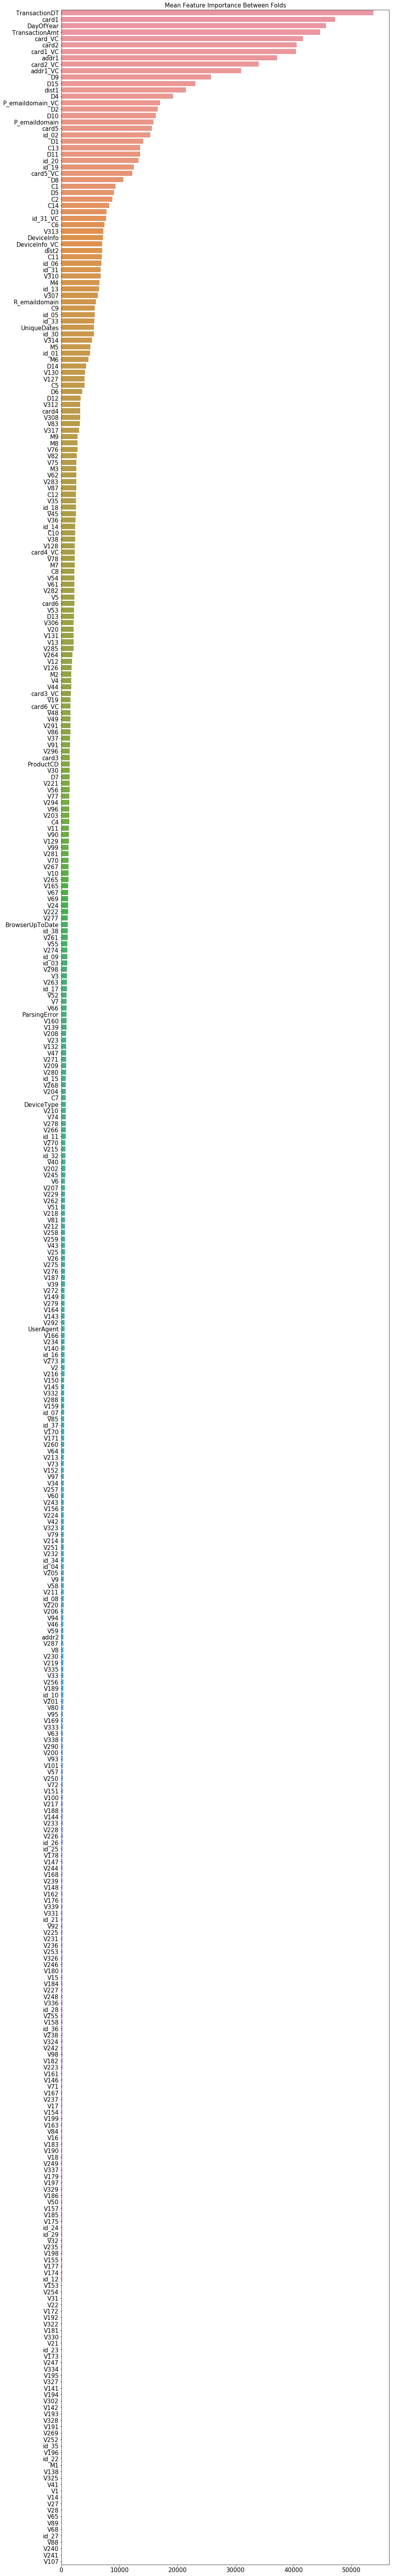

In [7]:
importance['Mean_Importance'] = importance.sum(axis=1) / N
importance.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 120))
sns.barplot(x='Mean_Importance', y=importance.index, data=importance)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Mean Feature Importance Between Folds', size=15)

plt.show()

In [8]:
submission = pd.read_csv('../input/ieee-fraud-detection/sample_submission.csv', index_col='TransactionID')
submission['isFraud'] = y_pred
submission.to_csv('submission.csv')
submission.head()

,isFraud
TransactionID,
3663549,0.000588
3663550,0.000807
3663551,0.001072
3663552,0.001540
3663553,0.000613
